In [45]:
import os 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, TensorBoard
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing import image


In [10]:
image_dir = 'D:/Work/Retinopathy/eye dataset/rim/'

In [11]:
glaucoma_dir = image_dir + 'glaucoma/'
normal_dir = image_dir + 'normal/'
print(len(os.listdir(glaucoma_dir)))
print(len(os.listdir(normal_dir))) 

1700
1714


In [44]:
os.listdir(image_dir)


['glaucoma', 'normal']

In [13]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest', validation_split=0.2)

train_data = train_datagen.flow_from_directory(image_dir, 
                                              target_size= (256, 256),
                                              class_mode= "binary",
                                              batch_size=32,
                                              subset='training'
                                              )

# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255)

val_data= train_datagen.flow_from_directory(image_dir, 
                                              target_size= (256, 256),
                                              class_mode= "binary",
                                              batch_size=32,
                                              shuffle= False,
                                              subset='validation'
                                              )

training data :
Found 2732 images belonging to 2 classes.

validation data :
Found 682 images belonging to 2 classes.


In [14]:
model= Sequential()

model.add(Conv2D(filters= 16, kernel_size=(3,3), activation="relu", input_shape=(256,256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters= 32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units= 512, activation='relu'))
model.add(Dropout(0.1))

#model.add(Dense(units= 256, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [15]:
model.compile(loss= "binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["accuracy"])

callbacks = [
        EarlyStopping(patience=5, monitor='val_loss',mode = "min"),
        TensorBoard(log_dir='logs')]

model_checkpoint = ModelCheckpoint('glaucoma_checkpoint.hdf5',
                                    monitor = 'val_accuracy',
                                    verbose = 1,
                                    save_best_only= True,
                                    mode= 'max')


history= model.fit(train_data,
                    steps_per_epoch= train_data.samples//train_data.batch_size,
                    validation_data= val_data,
                    validation_steps= val_data.samples//val_data.batch_size,
                    epochs= 30,
                    verbose=1,
                    #callbacks = callbacks 
                   )

Epoch 1/30
85/85 [==============================] - 143s 2s/step - loss: 0.6337 - accuracy: 0.6348 - val_loss: 0.6110 - val_accuracy: 0.6384
Epoch 2/30
85/85 [==============================] - 77s 896ms/step - loss: 0.4872 - accuracy: 0.7526 - val_loss: 0.4962 - val_accuracy: 0.7307
Epoch 3/30
85/85 [==============================] - 82s 961ms/step - loss: 0.4257 - accuracy: 0.7922 - val_loss: 0.4398 - val_accuracy: 0.7783
Epoch 4/30
85/85 [==============================] - 77s 899ms/step - loss: 0.3847 - accuracy: 0.8167 - val_loss: 0.4028 - val_accuracy: 0.8170
Epoch 5/30
85/85 [==============================] - 73s 859ms/step - loss: 0.3700 - accuracy: 0.8274 - val_loss: 0.4492 - val_accuracy: 0.7619
Epoch 6/30
85/85 [==============================] - 73s 853ms/step - loss: 0.3403 - accuracy: 0.8456 - val_loss: 0.4542 - val_accuracy: 0.7560
Epoch 7/30
85/85 [==============================] - 73s 849ms/step - loss: 0.3288 - accuracy: 0.8530 - val_loss: 0.3549 - val_accuracy: 0.8378
E

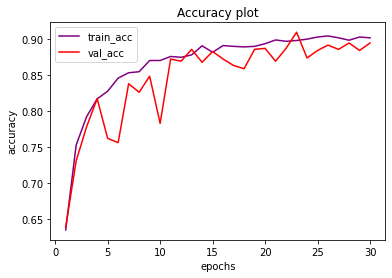

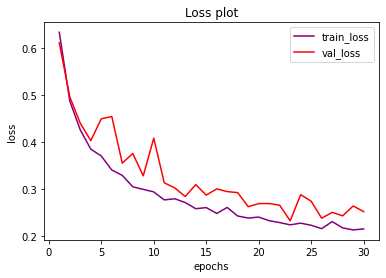

In [16]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="red")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [17]:
model.evaluate(val_data,verbose = 1)

22/22 [==============================] - 15s 668ms/step - loss: 0.2405 - accuracy: 0.8930


[0.24045361578464508, 0.892961859703064]

In [18]:
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)
prediction= (prediction > 0.5)
#prediction

22/22 [==============================] - 14s 641ms/step


In [19]:
cm= confusion_matrix(val_data.classes, prediction)
#plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

0.906158357771261
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       340
           1       0.88      0.94      0.91       342

    accuracy                           0.91       682
   macro avg       0.91      0.91      0.91       682
weighted avg       0.91      0.91      0.91       682



In [29]:
model.save('rim_all.h5')

In [49]:

def test(image_path):
    test_image = image.load_img(image_path, target_size = (256,256))
    test_image = image.img_to_array(test_image)/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(result[0])
    
    if result [0][0] < 0.5:
        print("Glaucoma")
    else:
        print("Not Glaucoma")

In [50]:
image_path = 'images/glaucoma/r1_im069.png'
test(image_path)

[0.0003662]
Glaucoma


In [51]:
image_path = 'images/normal/r1_im026.png'
test(image_path)

[0.59751487]
Not Glaucoma
